<img src="http://i.imgur.com/0dywhdR.png" >
# [FAQ] matplotlib: 특정 구간을 강조하려면?
* Q: 차트에서 특정 구간(기간)을 강조하려면 어떻게 하나요?
* A: axvspan() 함수를 활용 합니다.

<!-- TEASER_END -->

시계열 차트에서 특정한 기간에 대한 설명을 위해 강조하여 보이고자 할 때가 있다. (회색 칠 부분)
<img width="320" src="http://i.imgur.com/KYvT5FG.jpg" >

axvspan() 함수로 표현할 수 있다.

(별도의 설명이 없는 한 이 글에서 종가는 수정종가(Adj Close)를 말한다)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

# 특정 구간 강조
특정 기간을 강조하고자 할 때, 예를 들어 8/1 ~ 8/15 부분을 회색으로 강조하려면 다음과 같이 쓸 수 있다.

```python
span_start = datetime(2016, 8, 1)
span_end = datetime(2016, 8, 15)
plt.axvspan(span_start, span_end, facecolor='gray')
```

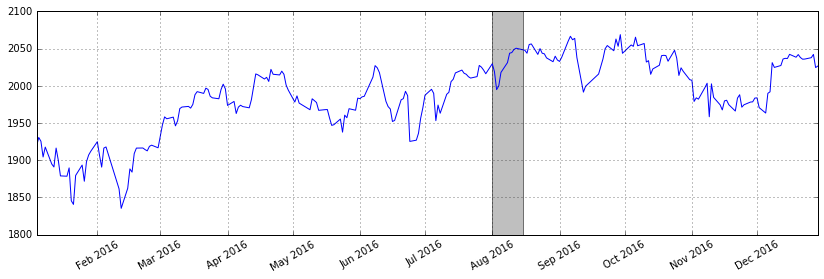

In [2]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data

# 2016년 코스피 지수
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
df = data.get_data_yahoo('^KS11', start, end)
plt.plot(df['Adj Close'])
plt.xticks(rotation=30)

# 강조 구간 (8/1 ~ 8/15)
span_start = datetime(2016, 8, 1)
span_end = datetime(2016, 8, 15)
plt.axvspan(span_start, span_end, facecolor='gray', alpha=0.5)

plt.show()

# 다수의 구간 강조

특정 조건에 해당하는 구간들을 모두 강조하기 위해, 강조할 구간들의 리스트를 만들어 다수의 구간을 강조하는데 활용할 수 있다.

다수의 구간 목록을 생성하여 드로잉하는 예제를 만들어 본다.

```python
df['over_ma'] = pd.rolling_mean(df['Adj Close'], 10) < df['Adj Close']
```

* df['over_ma'] 컬럼은 True 혹은 False 값을 갖는다
* 종가가 10일 이동평균 값보다 큰 경우 True, 아니면 False.

In [3]:
df['over_ma'] = pd.rolling_mean(df['Adj Close'], 10) < df['Adj Close']

In [4]:
# 연속해서 True 값을 가지는 구간의 목록을 튜플 리스트로 생성
range_list = []
prev_val = False

for inx, val in df['over_ma'].iteritems():
    if prev_val != val:
        if val:
            start = inx
        else:
            range_list.append((start, inx))

    prev_inx = inx
    prev_val = val
    
range_list

[(Timestamp('2016-01-25 00:00:00'), Timestamp('2016-01-26 00:00:00')),
 (Timestamp('2016-01-27 00:00:00'), Timestamp('2016-02-03 00:00:00')),
 (Timestamp('2016-02-04 00:00:00'), Timestamp('2016-02-11 00:00:00')),
 (Timestamp('2016-02-18 00:00:00'), Timestamp('2016-03-25 00:00:00')),
 (Timestamp('2016-03-29 00:00:00'), Timestamp('2016-04-01 00:00:00')),
 (Timestamp('2016-04-12 00:00:00'), Timestamp('2016-04-28 00:00:00')),
 (Timestamp('2016-05-25 00:00:00'), Timestamp('2016-06-13 00:00:00')),
 (Timestamp('2016-06-22 00:00:00'), Timestamp('2016-06-24 00:00:00')),
 (Timestamp('2016-06-30 00:00:00'), Timestamp('2016-07-06 00:00:00')),
 (Timestamp('2016-07-07 00:00:00'), Timestamp('2016-07-08 00:00:00')),
 (Timestamp('2016-07-11 00:00:00'), Timestamp('2016-07-29 00:00:00')),
 (Timestamp('2016-08-01 00:00:00'), Timestamp('2016-08-03 00:00:00')),
 (Timestamp('2016-08-05 00:00:00'), Timestamp('2016-08-22 00:00:00')),
 (Timestamp('2016-08-23 00:00:00'), Timestamp('2016-08-24 00:00:00')),
 (Time

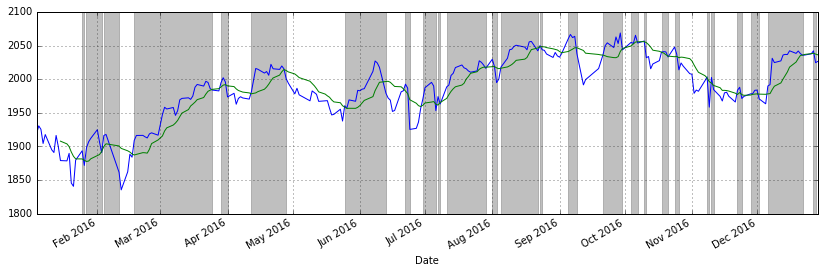

In [5]:
# 10일 이동평균 보다 가격이 높은 구간을 강조

plt.plot(df['Adj Close'])
pd.rolling_mean(df['Adj Close'], 10).plot()

for (start, end) in range_list:
    plt.axvspan(start, end, color='gray', alpha=0.5)

# 참고 자료
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axvspan
* http://matplotlib.org/examples/pylab_examples/axhspan_demo.html

#### 2016, 2017 [facebook.com/financedata](https://facebook.com/financedata)